/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


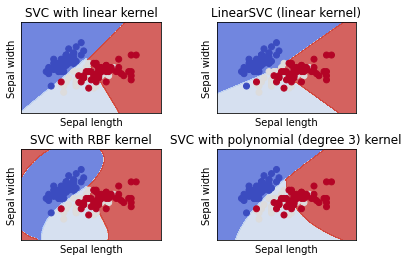

In [2]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()


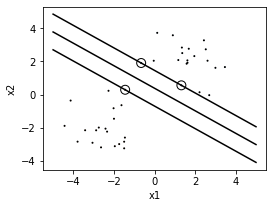

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split

np.random.seed(2)# we create 40 linearly separable points
x=[]
x1=np.random.randn(20, 2) - [2, 2]
x2=np.random.randn(20, 2) + [2, 2]
x=np.append(x1,x2)
x=x.reshape(40,2)
y = [0] * 20 + [1] * 20# fit the model

clf = svm.SVC(kernel='linear', C=1)
clf.fit(x, y)# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,facecolors="none", zorder=10, edgecolors="k")


plt.scatter(x[20:, 0], x[20:, 1], y[20:], zorder=10, cmap=plt.cm.Paired,edgecolors="k")
plt.scatter(x[:20, 0], x[:20, 1], np.ones(20), zorder=10, cmap=plt.cm.Paired,edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
bankdata = pd.read_csv("bill_authentication.csv")
bankdata.shape
bankdata.head()
X = bankdata.drop('Class', axis=1)
y = bankdata['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[142   1]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       143
           1       0.99      1.00      1.00       132

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames)
X = irisdata.drop('Class', axis=1)
y = irisdata['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [4]:
#poly kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [6]:
#gussian kernel
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [7]:
#sigmoid kernel 
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 11  0]
 [ 0  9  0]
 [ 0 10  0]]
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        11
Iris-versicolor       0.30      1.00      0.46         9
 Iris-virginica       0.00      0.00      0.00        10

       accuracy                           0.30        30
      macro avg       0.10      0.33      0.15        30
   weighted avg       0.09      0.30      0.14        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:

doc="If we compare the performance of the different types of kernels we can clearly see that the sigmoid kernel performs the worst. This is due to the reason that sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary classification problems. However, in our case we had three output classes."
doc2="Amongst the Gaussian kernel and polynomial kernel, we can see that Gaussian kernel achieved a perfect 100% prediction rate while polynomial kernel misclassified one instance. Therefore the Gaussian kernel performed slightly better. However, there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on your test dataset."
print(doc)
print(doc2)

If we compare the performance of the different types of kernels we can clearly see that the sigmoid kernel performs the worst. This is due to the reason that sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary classification problems. However, in our case we had three output classes.
Amongst the Gaussian kernel and polynomial kernel, we can see that Gaussian kernel achieved a perfect 100% prediction rate while polynomial kernel misclassified one instance. Therefore the Gaussian kernel performed slightly better. However, there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on your test dataset.
